In [445]:
from math import exp
import numpy as np

class LogisticRegression():
    def __init__(self, max_iter, n_variables, X, y):
        super().__init__()
        self.max_iter = max_iter
        #We add 1 to the number of variables so we compute the bias term too.
        self.n_variables = n_variables + 1
        self.y = y
        #We add a 1 on every array to compute theta_0
        self.X = [] 
        for x in X:
            self.X.append(np.append(np.array([1]),x))
        self.X = np.array(self.X)
        self.theta = np.zeros(self.n_variables)
        
    def sigma(self, t):
        return 1/(1+exp(-t))
    
    #Derivative of logit cost function as expressed on page 139 of Hands-On Machine Learning
    #with Scikit-Learn & TensorFlow by Aurélien Géron
    
    def DerCostFunction(self):
        partial_theta = []
        for i in range(self.n_variables):
            valor = 0
            for j in range(len(self.X)):
                valor += (self.sigma(np.dot(self.X[j], self.theta)) - self.y[j])*self.X[j][i]
            partial_theta.append(valor * (1/len(self.X)))
        #print("Der theta:", partial_theta)
        return np.array(partial_theta)
    
    def train(self, eta = 0.01):
        #We use Gradient Descent to compute the theta's.
        for i in range(self.max_iter):
            self.theta = self.theta - eta * self.DerCostFunction()
            #print("Theta:", self.theta)
        return self.theta
    
    def Predict(self, v):
        return sigma(self.theta[0] + np.dot(v, self.theta[1:]))
    
    def PredictAll(self):
        probabilities = []
        for i in range(len(self.X)):
            probabilities.append([self.y[i], self.sigma(np.dot(self.theta, self.X[i]))])
        return np.array(probabilities)

In [451]:
from sklearn import datasets
iris = datasets.load_iris()

X_iris = iris.data
y_iris = (iris.target == 2).astype(np.int)

In [454]:
logit_iris = LogisticRegression(max_iter = 40, n_variables = 4, X = X_iris, y = y_iris)

In [461]:
logit_iris.train()

array([-0.03250173, -0.09388055, -0.10789136,  0.10544563,  0.06630034])

In [463]:
probas = logit_iris.PredictAll()

In [464]:
#We evaluate the performance of the regression
import sklearn.metrics as metrics
preds = probas[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_iris, preds)
roc_auc = metrics.auc(fpr, tpr)

In [471]:
print("AUC: {:.4f}, Gini: {:.4f}".format(roc_auc, 2*roc_auc -1))

AUC: 0.9686, Gini: 0.9372


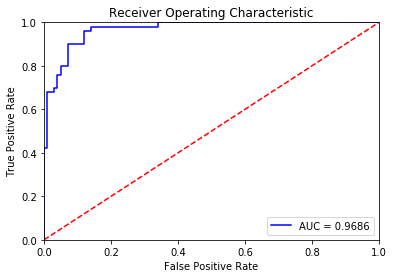

In [472]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()